## Importing libraries

In [2]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c glemaitre imbalanced-learn

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /glemaitre/osx-arm64/current_repodata.json HTTP/1.1" 404 None
- DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /glemaitre/osx-arm64/repodata.json HTTP/1.1" 304 0
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
- DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /glemaitre

In [4]:
!pip install imblearn

In [5]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [6]:
from imblearn import under_sampling, over_sampling

from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
#installing a new library
!pip install outlier_utils

In [10]:
!pip install imbalanced-learn 
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)

In [11]:
import seaborn as sns

In [12]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter

In [13]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot


### Loading dataset

Dataset https://www.kaggle.com/datasets/shriyashjagtap/fraudulent-e-commerce-transactions/data

Data: Fraudulent_E-Commerce_Transaction_Data.csv

In [14]:
data_df = pd.read_csv('/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Practical ML/Fraud Detection/Fraudulent_E-Commerce_Transaction_Data.csv')

## Exploratory Data Analysis

In [15]:
data_df.shape

(1472952, 16)

In [16]:
data_df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.090000,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.960000,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.190000,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.170000,2024-03-16 20:41:31,bank transfer,clothing,5,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124,20
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.530000,2024-01-15 05:08:17,bank transfer,clothing,2,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158,5


In [17]:
# Let's have a quick view of the dataset
tmp_df = data_df.head(1).T
tmp_df.columns = ['sample']
tmp_df['dtypes'] = data_df.dtypes
tmp_df

,sample,dtypes
Transaction ID,15d2e414-8735-46fc-9e02-80b472b2580f,object
Customer ID,d1b87f62-51b2-493b-ad6a-77e0fe13e785,object
Transaction Amount,58.090000,float64
Transaction Date,2024-02-20 05:58:41,object
Payment Method,bank transfer,object
Product Category,electronics,object
Quantity,1,int64
Customer Age,17,int64
Customer Location,Amandaborough,object
Device Used,tablet,object


In [18]:
# Do we have rows that have any null values?

data_df.isnull().values.any()

False

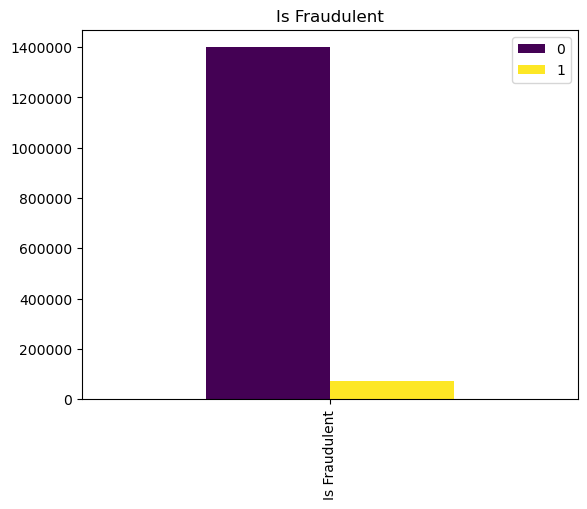

In [19]:
col = 'Is Fraudulent'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

## Data Cleaning & Feature Engineering

In [20]:
# Data cleaning

def clean_data(data_df) -> pd.DataFrame:

    # Fixing the transaction date  to datetime format
    data_df["Transaction Date"] = pd.to_datetime(data_df["Transaction Date"])


    # Extract Day, Day of the Week, and Month
    data_df["Transaction Day"] = data_df["Transaction Date"].dt.day
    data_df["Transaction DOW"] = data_df["Transaction Date"].dt.day_of_week
    data_df["Transaction Month"] = data_df["Transaction Date"].dt.month


    # Fix the customers' age
    mean_value = np.round(data_df['Customer Age'].mean(),0) 
    data_df['Customer Age'] = np.where(data_df['Customer Age'] <= -9, 
                                    np.abs(data_df['Customer Age']), 
                                    data_df['Customer Age'])

    data_df['Customer Age'] = np.where(data_df['Customer Age'] < 9, 
                                    mean_value, 
                                    data_df['Customer Age'])

    # Check if the shipping address
    data_df["Is Address Match"] = (data_df["Shipping Address"] == data_df["Billing Address"]).astype(int)

    # Remove irrelevant columns
    data_df.drop(columns = ["Transaction ID", "Customer ID", "Customer Location",
                     "IP Address", "Transaction Date","Shipping Address","Billing Address"], inplace = True)

    
    int_col = data_df.select_dtypes(include="int").columns
    float_col = data_df.select_dtypes(include="float").columns

    data_df[int_col] = data_df[int_col].apply(pd.to_numeric, downcast='integer')
    data_df[float_col] = data_df[float_col].apply(pd.to_numeric, downcast='float')

    return data_df

In [21]:
data_df = clean_data(data_df)

In [22]:
# Cleaned data_df
data_df

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Transaction Day,Transaction DOW,Transaction Month,Is Address Match
0,58.090000,bank transfer,electronics,1,17.000000,tablet,0,30,5,20,1,2,1
1,389.959991,debit card,electronics,2,40.000000,desktop,0,72,8,25,6,2,1
2,134.190002,PayPal,home & garden,2,22.000000,tablet,0,63,3,18,0,3,1
3,226.169998,bank transfer,clothing,5,31.000000,desktop,0,124,20,16,5,3,1
4,121.529999,bank transfer,clothing,2,51.000000,tablet,0,158,5,15,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472947,208.479996,PayPal,health & beauty,2,29.000000,desktop,0,149,23,12,4,1,1
1472948,231.570007,credit card,clothing,2,32.000000,tablet,0,132,4,27,2,3,1
1472949,101.800003,bank transfer,electronics,4,36.000000,mobile,0,98,23,31,2,1,0
1472950,61.799999,bank transfer,electronics,5,34.000000,desktop,0,191,16,12,4,1,1


<Axes: xlabel='Transaction Amount', ylabel='Count'>

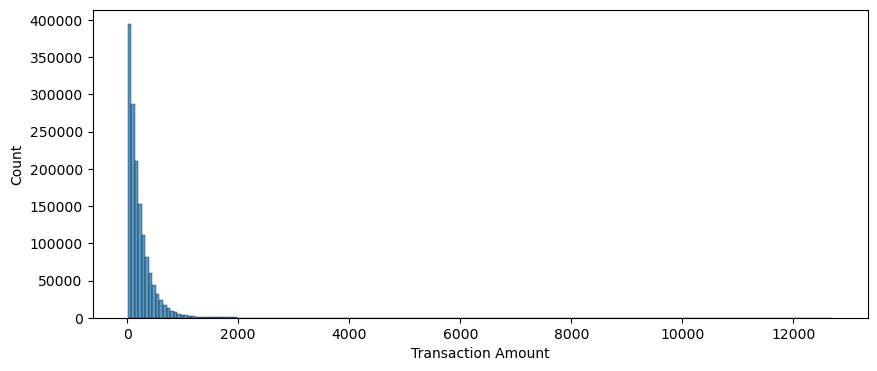

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(data_df["Transaction Amount"],bins=200)

In [24]:
column = ['Payment Method', 'Product Category', 
       'Quantity', 'Device Used','Transaction DOW', 
       'Transaction Month','Is Address Match']

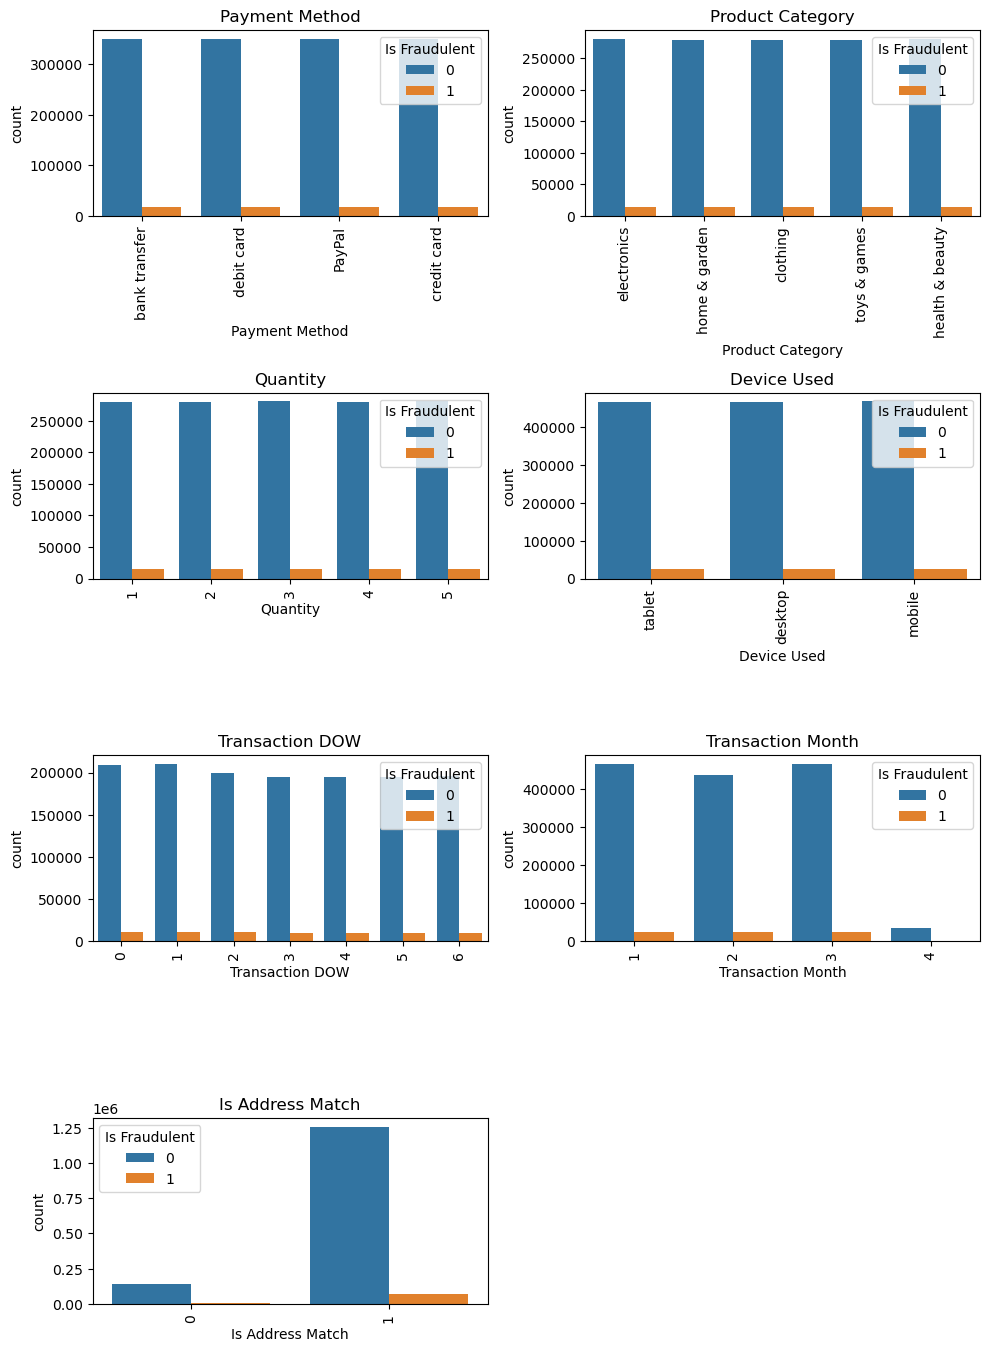

In [25]:
plt.figure(figsize=(10,35))
plot_num = 1
for col in column:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=data_df, x=col, hue="Is Fraudulent")
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
    plot_num += 1

In [26]:
# Renaming some variables

data_df.rename(columns = {'Transaction Amount' : 'Transaction_Amount',
                          'Payment Method' : 'Payment_Method',
                          'Product Category' : 'Product_Category',
                          'Customer Age' : 'Customer_Age',
                          'Device Used' : 'Device_Used',
                          'Is Fraudulent' : 'Is_Fraudulent',
                          'Account Age Days' : 'Account_Age_Days',
                          'Transaction Hour' : 'Transaction_Hour',
                          'Transaction Day' : 'Transaction_Day',
                          'Transaction DOW' : 'Transaction_DOW',
                          'Transaction Month' : 'Transaction_Month',
                          'Is Address Match' : 'Is_Address_Match'},
                          inplace = True)

data_df.columns

Index(['Transaction_Amount', 'Payment_Method', 'Product_Category', 'Quantity',
       'Customer_Age', 'Device_Used', 'Is_Fraudulent', 'Account_Age_Days',
       'Transaction_Hour', 'Transaction_Day', 'Transaction_DOW',
       'Transaction_Month', 'Is_Address_Match'],
      dtype='object')

In [27]:
# Converting the values of these variables into categorical
data_df['Payment_Method'] = data_df['Payment_Method'].astype('category')
data_df['Product_Category'] = data_df['Product_Category'].astype('category')
data_df['Device_Used'] = data_df['Device_Used'].astype('category')

# Payment Method
data_df['Payment_Method'].replace(['PayPal', 'bank transfer', 'credit card', 'debit card'],
                                   [1, 2, 3, 4], inplace = True)

# Product Category
data_df['Product_Category'].replace(['clothing', 'electronics', 'health & beauty', 'home & garden', 'toys & games'],
                                     [1, 2, 3, 4, 5], inplace = True)

# Device Used
data_df['Device_Used'].replace(['desktop', 'mobile', 'tablet'],
                                [1, 2, 3], inplace = True)

In [28]:
# Converting these variables to float
data_df['Payment_Method'] = data_df['Payment_Method'].astype('float')
data_df['Product_Category'] = data_df['Product_Category'].astype('float')
data_df['Device_Used'] = data_df['Device_Used'].astype('float')

## Normality Test 
### (Grubb's Test, Shapiro Normality, D’Agostino’s K^2, Box Cos transformation)

### Anomaly Detection

### via Clustering

In [29]:
y = data_df.Is_Fraudulent
X = data_df.drop(['Is_Fraudulent'],axis=1)

In [29]:
%%time

lof_model = LocalOutlierFactor(n_neighbors=2)
y_pred = lof_model.fit_predict(X)

### via Grubb's Test

'Before'

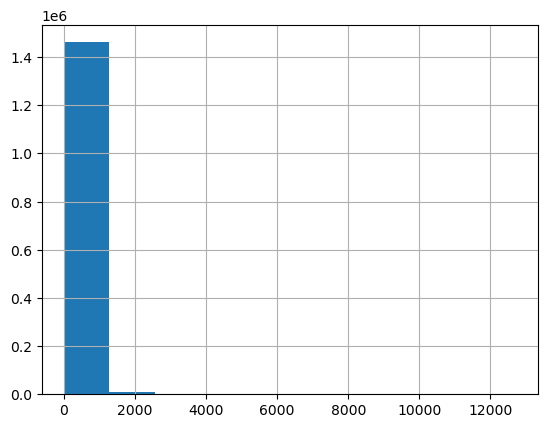

'After'

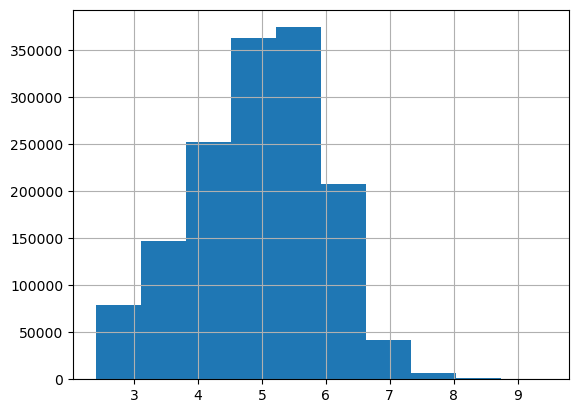

In [30]:
series_tmp = data_df['Transaction_Amount'].copy()
display("Before")
series_tmp.hist()
plt.show()

boxcox_series_tmp = pd.Series(boxcox1p(series_tmp,0))
display("After")
boxcox_series_tmp.hist()
plt.show()


'Before'

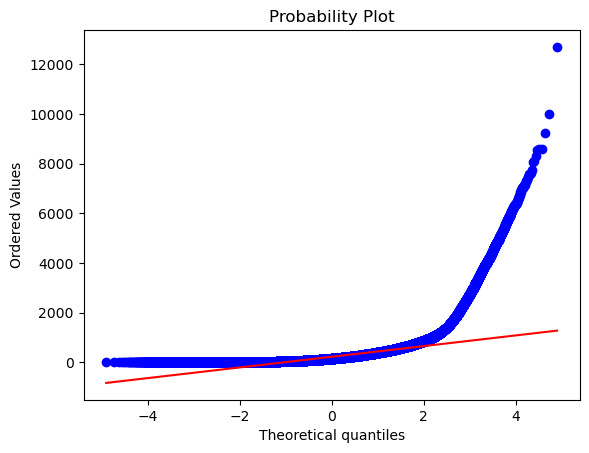

'After'

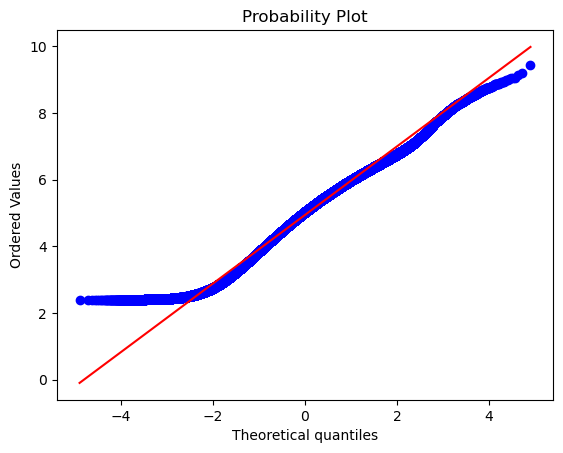

In [31]:
display("Before")
probplot(series_tmp, dist="norm", plot=plt)
plt.show()



display("After")
probplot(boxcox_series_tmp, dist="norm", plot=plt)
plt.show()

In [32]:
print("Using Shapiro Normality Test")
print("Before: ")
print(shapiro(series_tmp))

print("After")
print(shapiro(boxcox_series_tmp))

print("")

print("Using D’Agostino’s K^2 Normality Test")
print("Before: ")
print(normaltest(series_tmp))

print("After")
print(normaltest(boxcox_series_tmp))

Using Shapiro Normality Test
Before: 
ShapiroResult(statistic=0.6307876110076904, pvalue=0.0)
After
ShapiroResult(statistic=0.990993857383728, pvalue=0.0)

Using D’Agostino’s K^2 Normality Test
Before: 
NormaltestResult(statistic=1682910.293871136, pvalue=0.0)
After
NormaltestResult(statistic=23303.94603203572, pvalue=0.0)


In [33]:
# test for normality first
# transform to normal / guassian distribution to fit  if normality test fails
# run grubb's test



print("Our transformed data set length count: ")
print(len(boxcox_series_tmp))
grubbs_result = grubbs.test(boxcox_series_tmp, alpha=0.05)

print("Our Grubbs test result length count: ")
print(len(grubbs_result))

print("Grubs test works by returning the dataset and removing the anomalies, you can see that we returned missing 1, which means we found 1 anomaly")

Our transformed data set length count: 
1472952
Our Grubbs test result length count: 
1472952
Grubs test works by returning the dataset and removing the anomalies, you can see that we returned missing 1, which means we found 1 anomaly


### SMOTE

In [34]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [35]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1399114, 1: 1399114})


### Train and Test dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X.columns 

### Logistic Regression

In [37]:
# Base model using all variables
logreg_model = LogisticRegression(random_state=0)

# Let's input our training data set and fit our model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

Feature: 0 - Transaction_Amount, Score: 0.002181
Feature: 1 - Payment_Method, Score: 0.148279
Feature: 2 - Product_Category, Score: 0.145797
Feature: 3 - Quantity, Score: -0.157155
Feature: 4 - Customer_Age, Score: 0.016543
Feature: 5 - Device_Used, Score: 0.143451
Feature: 6 - Account_Age_Days, Score: -0.004852
Feature: 7 - Transaction_Hour, Score: -0.079263
Feature: 8 - Transaction_Day, Score: 0.004078
Feature: 9 - Transaction_DOW, Score: -0.050913
Feature: 10 - Transaction_Month, Score: -0.236740
Feature: 11 - Is_Address_Match, Score: -0.044754


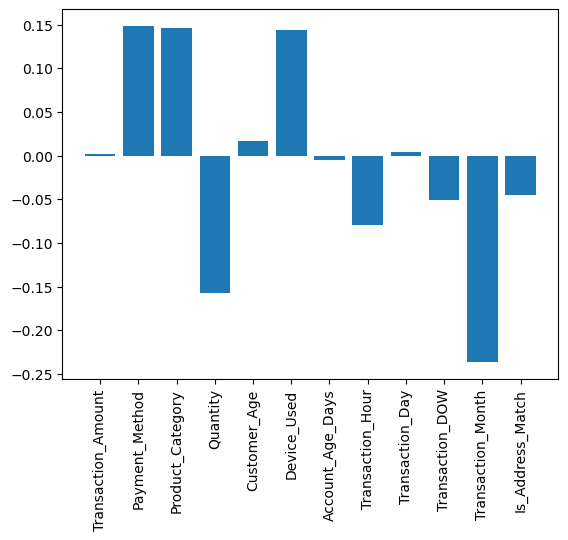

In [38]:
importance = logreg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [39]:
# predict against X_test
y_pred = logreg_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [41]:
from sklearn import metrics

In [44]:
import seaborn as sns

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[316839, 103228],
       [135662, 283740]])

<Axes: >

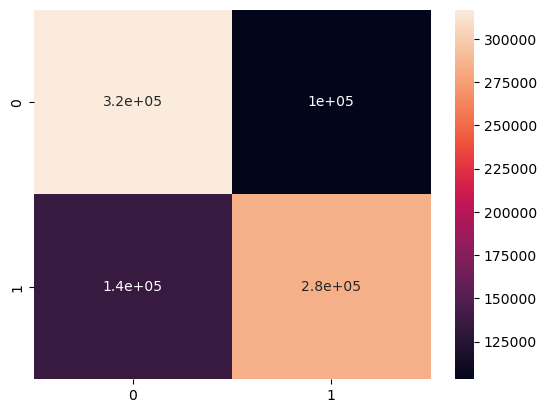

In [45]:
sns.heatmap(cnf_matrix, annot=True)

In [306]:
# Let's save our results in a variable for later use
y_pred_lr = y_pred

# How did our logistic regression perform?

print("accuracy: ",accuracy_score(y_test,y_pred_lr))
print("precision_score: ",precision_score(y_test,y_pred_lr))
print("recall_score: ",recall_score(y_test,y_pred_lr))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_lr)

accuracy:  0.7163480724124417
precision_score:  0.7344843375301698
recall_score:  0.6769710206436784
confusion matrix: 


array([[317429, 102638],
       [135479, 283923]])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


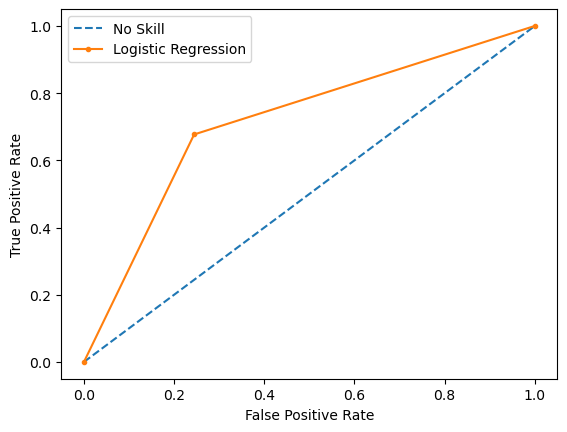

In [307]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_lr
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Neural network

In [308]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.



nn_model = MLPClassifier(random_state=0)

nn_model.fit(X_train, y_train)

CPU times: user 1h 33min 29s, sys: 4min 54s, total: 1h 38min 24s
Wall time: 12min 46s


MLPClassifier(random_state=0)

In [309]:
# predict against X_test
y_pred = nn_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [310]:
# Let's save our results in a variable for later use
y_pred_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nn))
print("precision_score: ",precision_score(y_test,y_pred_nn))
print("recall_score: ",recall_score(y_test,y_pred_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nn)

accuracy:  0.8675448408458204
precision_score:  0.9334343991179713
recall_score:  0.7913100080590937
confusion matrix: 


array([[396400,  23667],
       [ 87525, 331877]])

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.867


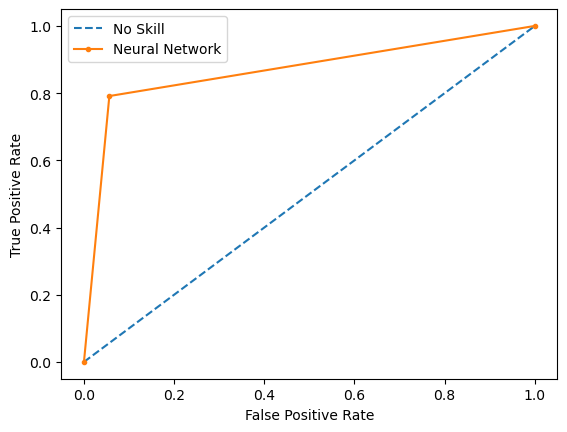

In [311]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Revised Neural Network

In [312]:
# Let's remove the features and create our revised train test dataset
revised_X = X.drop(['Product_Category', 'Transaction_Hour', 'Transaction_DOW', 'Transaction_Month', 'Is_Address_Match'], axis=1)
revised_X_train, revised_X_test, y_train, y_test = train_test_split(revised_X, y, test_size=0.3, random_state=0)

In [313]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.



revised_nn_model = MLPClassifier(random_state=0)

revised_nn_model.fit(revised_X_train, y_train)


CPU times: user 1h 39min 55s, sys: 6min 37s, total: 1h 46min 33s
Wall time: 14min 8s


MLPClassifier(random_state=0)

In [314]:
# predict against X_test
y_pred = revised_nn_model.predict(revised_X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [315]:
# Let's save our results in a variable for later use
y_pred_revised_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_revised_nn))
print("precision_score: ",precision_score(y_test,y_pred_revised_nn))
print("recall_score: ",recall_score(y_test,y_pred_revised_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_revised_nn)

accuracy:  0.8481254221418539
precision_score:  0.8918964637650029
recall_score:  0.7920062374523726
confusion matrix: 


array([[379806,  40261],
       [ 87233, 332169]])

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.848


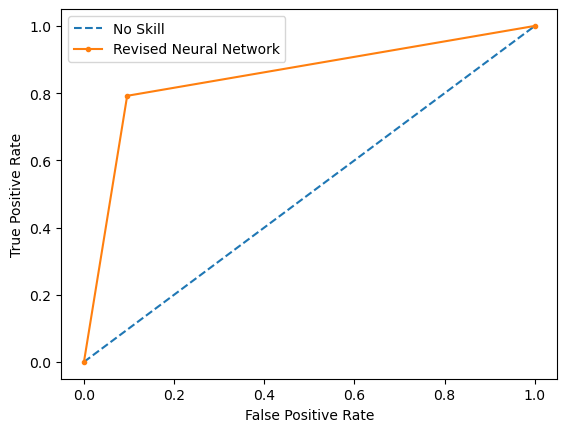

In [316]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_revised_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Revised Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Summary of evaluation metrics

In [317]:
tmp_list = []
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_lr), "precision":precision_score(y_test,y_pred_lr), "recall":recall_score(y_test,y_pred_lr),"roc auc": roc_auc_score(y_test,y_pred_lr)}
tmp_list.append(tmp_dict)
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_nn), "precision":precision_score(y_test,y_pred_nn), "recall":recall_score(y_test,y_pred_nn),"roc auc":roc_auc_score(y_test,y_pred_nn)}
tmp_list.append(tmp_dict)
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_revised_nn), "precision":precision_score(y_test,y_pred_revised_nn), "recall":recall_score(y_test,y_pred_revised_nn),"roc auc":roc_auc_score(y_test,y_pred_revised_nn)}
tmp_list.append(tmp_dict)

scores_df = pd.DataFrame(tmp_list)
scores_df.index = ['LogisticRegression','NeuralNetworks','RevisedNeuralNetworks']
scores_df

,accuracy,precision,recall,roc auc
LogisticRegression,0.716348,0.734484,0.676971,0.716317
NeuralNetworks,0.867545,0.933434,0.791310,0.867484
RevisedNeuralNetworks,0.848125,0.891896,0.792006,0.848081


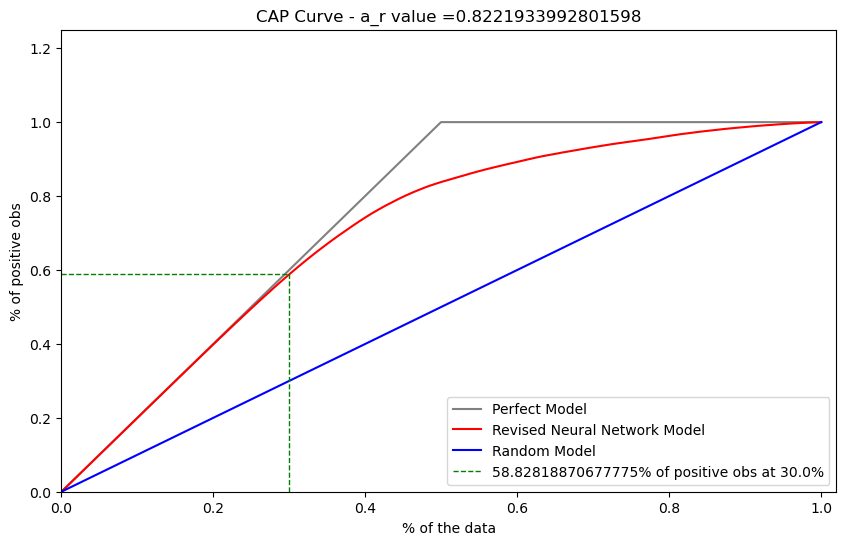

In [318]:


def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    #print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.3
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.subplots(nrows = 1, ncols = 1)

    
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='Revised Neural Network Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

    
# Let's store the pred probability for use later when we call the CAP function
revised_y_pred_proba = revised_nn_model.predict_proba(X=revised_X_test)

# Let's cal lthe cap curve function. What does this is pass the y_test (which contains our target classification
# as well as the predicted probabilities. The intention is to chart our CAP and see what is the optimal approach to 
# acting on our scored transaction list 
capcurve(y_test,revised_y_pred_proba[:,1])